データサイエンスはあらゆる種類のデータを処理・分析し、そこから有益な価値を生み出すことを目的としています。そのためデータの種類や表現方法について理解しておくことは、データサイエンスの基礎を理解する上で重要です。データの種類は数値や文字だけでしょうか。この章ではデータの種類と表現方法について学びます。

## ベクトル

`c()`関数を作ってベクトルオブジェクトを生成します。ベクトルには複数の要素を含めることができ、カンマ`,`で要素を区切って記述します。

In [1]:
# 動物の体重
x <- c(6, 3.5, 5.4)
x

# 動物園の来園者数
c(320, 615, 1023)

[1] 6.0 3.5 5.4

[1]  320  615 1023

動物の分類群のベクトルを作成しましょう。

In [2]:
#| eval: false
# 動物の分類群
c()

NULL

ベクトルの要素を取り出すには、`[]`演算子を使います。`[]`の中には、取り出したい要素の位置を指定します。Rでは要素を数える際の番号は1から始まります。また`:`演算子を使ってベクトルの要素の範囲を指定することも可能です。

In [3]:
x[1] # 最初の要素を取り出す

x[2:3] # 2から3番目の要素を取り出す

[1] 6

[1] 3.5 5.4

では、次のコードを実行するとどうなるでしょうか。コードを実行する前に出力結果を予想してみましょう。

In [4]:
#| eval: false
x[-2]

[1] 6.0 5.4

`c()`関数の性質として、ベクトルの要素に異なるデータ型を与えた場合、ベクトルの要素は全て同じデータ型に変換されます。例えば、数値と文字列を混在させると全ての要素が文字列に変換されます。

In [5]:
# ベクトルの要素に数値と文字列を混ぜる
c(1, 2, 3, "a")

[1] "1" "2" "3" "a"

この出力結果を見ると、数値の1, 2, 3が文字列に変換されていることがわかります。このように、ベクトルの要素は全て同じデータ型に変換されます。同様に論理値も文字列に変換されます。

In [6]:
c(TRUE, "真")

# 論理値は数値に変換可能なため、数値が含まれたベクトルでは数値に変換される
c(1, 2, 3, TRUE, FALSE, NA)

[1] "TRUE" "真"

[1]  1  2  3  1  0 NA

## データフレーム

データフレームは行と列からなる表形式のデータ構造です。行はデータの個々の観測値を表し、列はデータの変数を表します。

データフレームは、複数のベクトルを組み合わせ、`data.frame()`関数を使って作成します。`data.frame()`関数の引数には、列名となるベクトルを指定します。列名は文字列で指定します。

In [7]:
# 動物についてのデータフレームを作成
taxon <- c("食肉類", "霊長類", "霊長類", "食肉類", "鳥類")

# data.frame()関数の引数には、列名となるベクトルを指定する
# ベクトルはdata.frame()関数の外側で定義されたものを与えてもよい
df_zoo <- 
  data.frame(
    taxon = taxon,
    species = c("レッサーパンダ", "チンパンジー", "マントヒヒ", "ライオン", "フンボルトペンギン"),
    body_length_cm = c(63.5, 85.0, 80.0, 250.0, 69.0),
    body_weight_kg = c(6, 60, 20, 225, 6)
)

df_zoo

taxon,species,body_length_cm,body_weight_kg
<chr>,<chr>,<dbl>,<dbl>
食肉類,レッサーパンダ,63.5,6
霊長類,チンパンジー,85.0,60
霊長類,マントヒヒ,80.0,20
食肉類,ライオン,250.0,225
鳥類,フンボルトペンギン,69.0,6


データ分析や可視化を行う際など、データフレームはよく使われるデータ構造です。データフレームに含まれるデータをもとに、線形回帰モデルの適用や散布図の作成が可能です。

In [8]:
# lm()関数を用いた線形回帰モデルの適用
# 体長と体重の関係を表す線形回帰モデルを作成
# y ~ ax + b の一次関数を記述します
lm(body_length_cm ~ body_weight_kg, data = df_zoo)


Call:
lm(formula = body_length_cm ~ body_weight_kg, data = df_zoo)

Coefficients:
   (Intercept)  body_weight_kg  
       56.2987          0.8391  


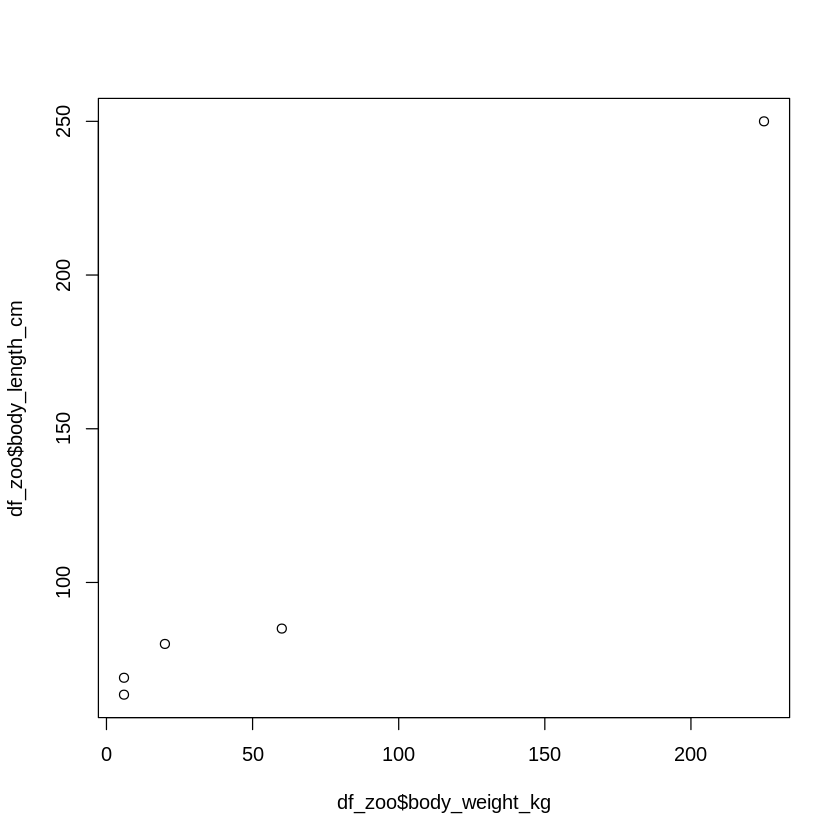

In [9]:
plot(df_zoo$body_weight_kg, df_zoo$body_length_cm)

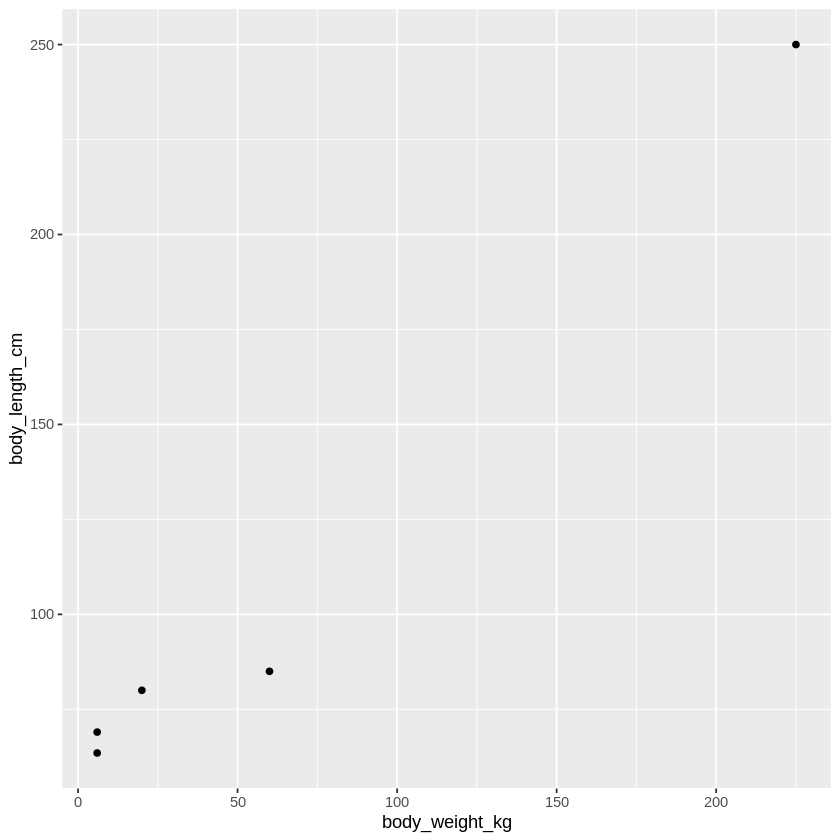

In [10]:
# ggplot2パッケージを用いた散布図の作成
library(ggplot2)
ggplot(data = df_zoo) +
  aes(body_weight_kg, body_length_cm) + geom_point()

### csvファイルの読み込み

csvファイルはカンマ`,`で区切られたテキストファイルです。csvファイルはテキストエディタや表計算ソフトで作成できます。編集に特別なソフトウェアを必要としないため、データのやり取りに便利です。

csvファイルを読み込むには`read.csv()`関数を使います。

In [11]:
# csvファイルの読み込み
# ローカル環境（自分のコンピュータ）にあるcsvファイルを読み込む場合は、ファイルが保存されている場所（パス）を指定する
# ウェブ上のデータを読み込む場合はURLを指定する
df_zoo22 <-
read.csv("https://raw.githubusercontent.com/uribo/tokupon_ds/main/data-raw/tokushima_zoo_animals22.csv")

# 先頭行のデータを表示
head(df_zoo22)

,taxon,name,body_length_cm,weight_kg
,<chr>,<chr>,<dbl>,<dbl>
1,食肉類,レッサーパンダ,63.5,6.0
2,鳥類,ホオジロカンムリヅル,100.0,3.5
3,食肉類,コツメカワウソ,64.0,5.4
4,鳥類,カナダガン,110.0,6.5
5,霊長類,チンパンジー,85.0,60.0
6,霊長類,シシオザル,66.0,10.0


### データフレームの操作

データフレームの変数の値を参照するにはいくつかの方法があります。代表的なものを紹介します。

1. `$`演算子を使う
2. `[[]]`演算子を使う

例えば、`df_zoo`の`body_length_cm`変数にアクセスするには次のようにします。

In [12]:
df_zoo$body_length_cm

df_zoo[["body_length_cm"]]

[1]  63.5  85.0  80.0 250.0  69.0

[1]  63.5  85.0  80.0 250.0  69.0

`$`演算子は参照したい変数名を文字列で指定します。`$`演算子は、`[]`演算子と異なり、複数の変数の値を同時に参照することはできません。

また、これらの参照方法はベクトルとして変数の値を確認するものでした。データフレームの構造を維持したまま、つまり特定の列として参照するには`[]`演算子を使います。

In [13]:
df_zoo[3]

body_length_cm
<dbl>
63.5
85.0
80.0
250.0
69.0


ベクトルの参照の例でも見たように、`[]`演算子での参照は`:`演算子や`-`を使った除外が可能です。

In [14]:
df_zoo[2:3]

df_zoo[-4]

df_zoo[c(1, 3)]

species,body_length_cm
<chr>,<dbl>
レッサーパンダ,63.5
チンパンジー,85.0
マントヒヒ,80.0
ライオン,250.0
フンボルトペンギン,69.0


taxon,species,body_length_cm
<chr>,<chr>,<dbl>
食肉類,レッサーパンダ,63.5
霊長類,チンパンジー,85.0
霊長類,マントヒヒ,80.0
食肉類,ライオン,250.0
鳥類,フンボルトペンギン,69.0


taxon,body_length_cm
<chr>,<dbl>
食肉類,63.5
霊長類,85.0
霊長類,80.0
食肉類,250.0
鳥類,69.0


`[]`演算子でのデータフレームの参照では、行と列の両方を指定できます。行と列を指定する場合は、`[行, 列]`の規則で参照する位置を指定します。

In [15]:
df_zoo[2, c(2, 3)] # 2行目の2,3列のデータ

,species,body_length_cm
,<chr>,<dbl>
2,チンパンジー,85


データフレームに対して柔軟な操作を行う際は`dplyr`パッケージを使うと便利です。

In [16]:
#| warning: false
# dplyrパッケージの読み込み
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




dplyrパッケージが提供するデータ操作のための主要な関数を示します。

- `select()`: 列を選択する
- `filter()`: 行を選択する
- `mutate()`: 列を加工する（上書き、追加）
- `arrange()`: 行を並び替える
- `group_by()`: グループ化する
- `summarise()`: グループごとに集計する

このほかにもたくさんのデータ操作関数が用意されています。いくつかの関数の使い方をみてみましょう。

dplyrのデータ操作関数は原則的にデータフレームを第一引数に与え、出力もデータフレームです。

In [17]:
# 列の選択
# 第一引数に対象のデータフレーム、第二引数以降に選択したい列名を指定する
select(df_zoo, species, body_length_cm, body_weight_kg)

species,body_length_cm,body_weight_kg
<chr>,<dbl>,<dbl>
レッサーパンダ,63.5,6
チンパンジー,85.0,60
マントヒヒ,80.0,20
ライオン,250.0,225
フンボルトペンギン,69.0,6


In [18]:
# 列（変数）の加工
# 体重と体長の情報からBMIを求めた列を追加する
mutate(df_zoo, bmi = body_weight_kg / (body_length_cm / 100) ^ 2)

taxon,species,body_length_cm,body_weight_kg,bmi
<chr>,<chr>,<dbl>,<dbl>,<dbl>
食肉類,レッサーパンダ,63.5,6,14.88003
霊長類,チンパンジー,85.0,60,83.04498
霊長類,マントヒヒ,80.0,20,31.25000
食肉類,ライオン,250.0,225,36.00000
鳥類,フンボルトペンギン,69.0,6,12.60239


In [19]:
# 行の抽出
# 体重が100kg以上の動物のみを抽出する
filter(df_zoo, body_weight_kg > 100)

taxon,species,body_length_cm,body_weight_kg
<chr>,<chr>,<dbl>,<dbl>
食肉類,ライオン,250,225


こうしたデータ操作は、データに対して複数の処理を適用することが一般的です。そのため、パイプ演算子`|>`を使うとより簡潔に書くことが可能となります。パイプ演算子でつながれた関数の第一引数には、自動的に前の関数の出力が与えられます。先ほどの例をパイプ演算子を使った処理に書き換えてみましょう。


In [20]:
# パイプ演算子を使ったデータ操作
df_zoo |>
  select(species, body_length_cm, body_weight_kg) |>
  mutate(bmi = body_weight_kg / (body_length_cm / 100) ^ 2) |> 
  filter(body_weight_kg > 100)

species,body_length_cm,body_weight_kg,bmi
<chr>,<dbl>,<dbl>,<dbl>
ライオン,250,225,36


![連続した処理をパイプ演算子を使って記述する](https://github.com/uribo/INNV1250/raw/main/img/base_pipe.jpeg)

## 次の一歩

- [徳島県オープンデータポータルサイト](https://opendata.pref.tokushima.lg.jp)から適当なデータをダウンロードして、データフレームとして読み込んでみましょう。
    - ファイルのダウンロードは`download.file()`関数を使って行います。
    - エクセルファイルの読み込みは`readxl`パッケージの`read_excel()`関数を使って行います。